In [1]:
# %% Import
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

from ast import literal_eval
import os
import sys
import json

from dataclasses import dataclass, field
from typing import Dict, Any, List
import re
import emoji
import operator
import time

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import datetime

# ML:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

# debugger:
from icecream import ic

import jieba # to split east-asian language to words

## USER DEFINED:
ABS_PATH = "/home/jx/JXProject/Github/UW__4B_Individual_Works/CS 480/Kaggle" # Define ur absolute path here

## Custom Files:
def abspath(relative_path):
    return os.path.join(ABS_PATH, relative_path)

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(abspath("src_code"))

# Custom Lib
import jx_lib
from jx_pytorch_lib import ProgressReport


In [2]:
# %% LOAD DATASET: ----- ----- ----- ----- ----- ----- ----- ----- ----- ----- #
# import data
TRAIN_DATA = pd.read_csv(abspath("processed_data/preprocessed-idx-train-[top-10k-all].csv"))
with open(abspath("processed_data/bow-dict-[top-10k-all].json"), "r") as f:
    word_to_ix = json.load(f)

In [15]:
X = [literal_eval(literal_eval(item)) for item in TRAIN_DATA["reply_to"]]

In [19]:
[0] * 0


[]

In [23]:
X_pd = TRAIN_DATA["norm-tweet-bow-idx-array"]
Y_pd = TRAIN_DATA["likes_count"]

In [24]:
print(len(X_pd), len(word_to_ix))

55824 10000


In [25]:
from sklearn.decomposition import PCA

In [35]:
N = 10000
A = np.zeros((N, len(word_to_ix)))

In [36]:
for i in range(N):
    idx = literal_eval(X_pd[i])
    for id in idx:
        A[i, id] += 1

In [37]:
y = Y_pd[0:N]

In [38]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(A)

In [39]:
pca_result

array([[-1.26918323, -1.13738294],
       [ 2.28917729, -0.39102782],
       [-0.02959475,  0.00449198],
       ...,
       [ 0.90819021, -0.06431112],
       [-1.59940228, -1.44077784],
       [ 1.79032167, -1.33420934]])

In [40]:
len(pca_result[:, 0])

10000

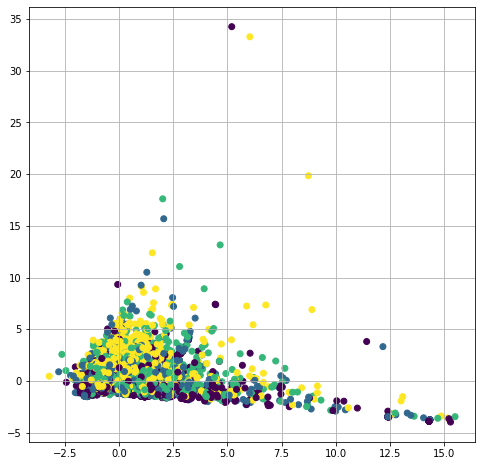

In [41]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
# ax.set_xlabel('Principal Component 1', fontsize = 15)
# ax.set_ylabel('Principal Component 2', fontsize = 15)
# ax.set_title('2 component PCA', fontsize = 20)
ax.scatter(pca_result[:, 0], pca_result[:, 1], c=y)
ax.grid()

In [8]:
import functools
import operator
import re

import emoji

em = 'Hey 😷😷😷'
em_split_emoji = emoji.get_emoji_regexp().split(em)



['Hey ', '[emoji]', '', '[emoji]', '', '[emoji]', '']


In [4]:
import torch
import torch.nn as nn

m = nn.MaxPool1d(3, stride=2)
input = torch.randn(1, 10)
output = m(input)

print(input)
print(output)

tensor([[ 1.2219, -0.7246, -1.5434, -0.1344, -0.8412, -0.1509, -0.8342, -1.4076,
          0.7435,  1.1528]])
tensor([[ 1.2219, -0.1344, -0.1509,  0.7435]])


In [2]:
input.shape

torch.Size([1, 10])

In [17]:
A = ["1", "2", "3"]
B = ["2", "3"]

A.extend(B*10)
print(A, B)

['1', '2', '3', '2', '3', '2', '3', '2', '3', '2', '3', '2', '3', '2', '3', '2', '3', '2', '3', '2', '3', '2', '3'] ['2', '3']
